## MN - Regresión Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Anteriormente vimos la regresión lineal, donde debiamos calcular los $b_i$ para luego calcular:

$$ y = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n $$

La regresión logistica predice la probabilidad **p** de ocurrencia de un evento binario, usando la función de Sigmoid, donde para y usamos la función de regresión lineal:

$$ p = S(y) = \frac{1}{1+e^{-y}} $$

Miremos como se comporta la función sigmoide:

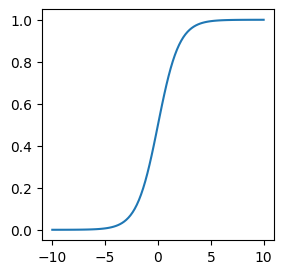

In [1]:
import numpy as np

f = lambda x: 1/(1+np.exp(-x))
x = np.linspace(-10,10,101)
y = f(x)
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.plot(x,y)
plt.show()

Como se aprecia, la función Sigmoid se ve como un **escalon**, la idea es claramente separar una decisión binaria.

### Ejemplo 1: Predictor diabetes

Veamos la base de datos de personas con diabetes en el pueblo indigena PIMA de Texas. La idea es predecir si la persona tiene o no diabetes.

In [2]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


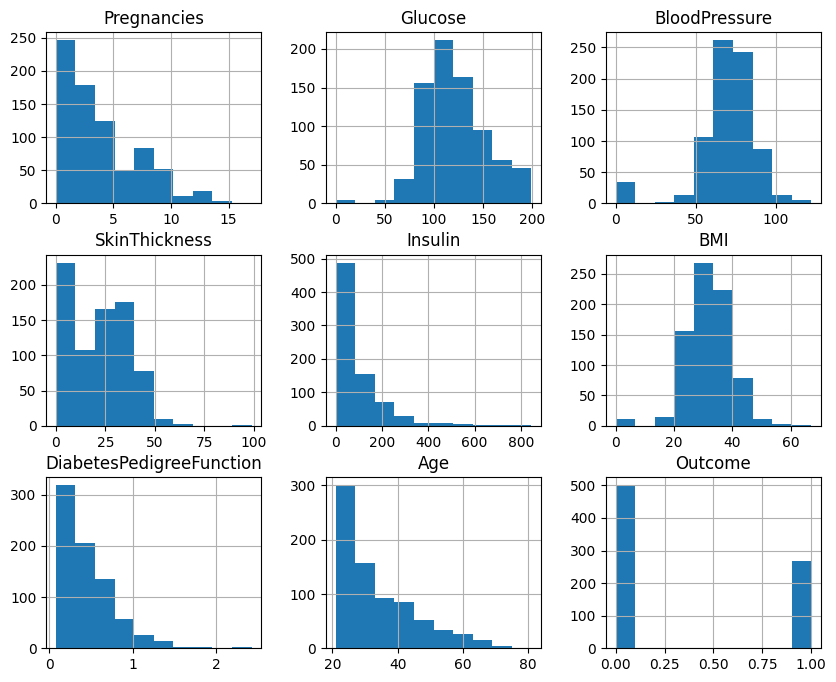

In [3]:
# miremos como se distribuyen los datos
pima.hist(figsize=(10,8))
plt.show()

In [4]:
corr = pima.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
# escogemos las variables que usaremos en el  modelo, outcome es si tiene o no diabetes
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction', 'SkinThickness']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [6]:
# separamos los datos, un 80% para entrenar el modelo, 20% para probarlo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
print(len(X_train), len(X_test), len(pima))

614 154 768


In [7]:
from sklearn.linear_model import LogisticRegression

# Creamos instancia del modelo de regresion logistica
logreg = LogisticRegression(random_state=16, max_iter=1000)

# entrenamos el modelo
logreg.fit(X_train, y_train)

# ejecutamos la prediccion
y_pred = logreg.predict(X_test)

Ahora que tenemos la predicción, lo podemos comparar contra los datos reales de ytest, se puede calcular la matriz de confusión (Confusion Matrix).

In [8]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[95,  7],
       [21, 31]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       102
   with diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154



La exactitud de 82% encontrada, se considera buena. Metricas tipicas utilizadas en estos modelos son:

**ROC (Receiver Operating Characteristic) Score**: es un gráfico que compara la tasa de verdaderos positivos con la de falsos positivos. Muestra el equilibrio entre sensibilidad y especificidad.

**AUC (Area under the curve) Score**: métrica de evaluación utilizada en aprendizaje automático, especialmente en problemas de clasificación, que mide el rendimiento de un modelo clasificatorio.

- AUC cercano a 1: El modelo tiene un rendimiento excelente, mostrando una alta capacidad para diferenciar entre clases.

- AUC cercano a 0.5: El modelo no es mejor que una suposición aleatoria, indicando una falta de poder discriminatorio.

- AUC cercano a 0: El modelo está haciendo peor que una suposición aleatoria, lo que sugiere un rendimiento muy pobre

In [10]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC score =", auc)

AUC score = 0.880656108597285


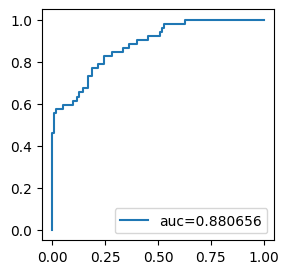

In [11]:
# Veamos la ROC.
plt.figure(figsize=(3,3))
plt.plot(fpr,tpr,label="auc="+str(auc)[:8])
plt.legend(loc=4)
plt.show()

### Ejemplo 2. Hotel Reservations

Este conjunto de datos contiene si la reserva fue o no cancelada (is_canceled). La idea es predecir o calcular la probabilidad que la reserva sea eliminada.

In [43]:
import pandas as pd

book = pd.read_csv('hotel_bookings.csv')
book.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [44]:
print("registros, columnas:", book.shape)

registros, columnas: (119390, 32)


In [45]:
# eliminamos datos no relevantes
columns_to_drop = ['country','agent','company','reservation_status','reservation_status_date']
book.drop(columns_to_drop, axis = 1, inplace = True)

# analicemos is_canceled
print("is_canceled:", book["is_canceled"].unique())

is_canceled: [0 1]


In [50]:
# revisemos si hay nulos o nan
print("Nulos:\n", book.isnull().sum())
print("Nan:\n", book.isna().sum())

Nulos:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64
Nan:
 h

In [53]:
# solo hay nan, regularmnete se puede llenar con La moda por cada registro.
book.mode()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0,0,2016,August,33,17,0,2,2,...,0,A,A,0,No Deposit,0,Transient,62.0,0,0


In [54]:
# asi se rellena
book.fillna(book.mode().iloc[0], inplace=True)

In [17]:
# Hay categorias no numericas que vamos a modificar, como meal
print("meal:", book["meal"].unique())

meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']


In [18]:
# identificamos cuales son
cat_cols = [col for col in book.columns if book[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [19]:
# convertimos cada variable en dummies
dummy_df = pd.get_dummies(book, columns=cat_cols)
dummy_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,2017,35,31,2,5,3,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119387,0,34,2017,35,31,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


Vemos que sube de 32 columnas a 79, pues por ejemplo meal, se transforma en meal_BB, meal_FB, meal_....

In [20]:
# revisemos
meal = book["meal"].unique()
for i in meal:
    print(i, dummy_df["meal_"+i].unique())

BB [1 0]
FB [0 1]
HB [0 1]
SC [0 1]
Undefined [0 1]


In [21]:
# seleccionamos las variables relevantes para el modelo, por ejemplo meal_undefined no tiene sentido
X = dummy_df[['lead_time',
              'stays_in_week_nights',
              'adults',
              'children',
              'previous_cancellations',
              'previous_bookings_not_canceled',
              'booking_changes',
              'adr',
              'required_car_parking_spaces',
              'total_of_special_requests',
              'hotel_City Hotel',
              'arrival_date_month_August','arrival_date_month_December','arrival_date_month_February','arrival_date_month_January',
              'arrival_date_month_July','arrival_date_month_June','arrival_date_month_March','arrival_date_month_May',
              'arrival_date_month_November','arrival_date_month_October','arrival_date_month_September',
              'meal_BB','meal_FB','meal_HB','meal_SC',
              'market_segment_Corporate','market_segment_Direct','market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',
              'reserved_room_type_B','reserved_room_type_C','reserved_room_type_D','reserved_room_type_E','reserved_room_type_F',
              'reserved_room_type_G','reserved_room_type_H',
              'deposit_type_Non Refund','deposit_type_Refundable',
              'customer_type_Group','customer_type_Transient','customer_type_Transient-Party']]

# select target/dependent variable
y = dummy_df['is_canceled']

In [22]:
# seria 43 columnas para el modelo vs is_canceled
X.shape, y.shape

((119390, 43), (119390,))

In [26]:
# nuevamente separamos 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
# fit the model on the training data
lr = LogisticRegression(random_state = 16, max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=16)

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# vemos como funciona
y_pred_lr = lr.predict(X_test)

# generate evaluation metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)

print("Exactitud de la regresion logistica =", acc_lr)
print("Confusion Matrix : \n", conf)

Exactitud de la regresion logistica = 0.8102856185610186
Confusion Matrix : 
 [[13973   934]
 [ 3596  5375]]


In [29]:
from sklearn.metrics import classification_report
target_names = ['no cancelado', 'cancelado']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

no cancelado       0.80      0.94      0.86     14907
   cancelado       0.85      0.60      0.70      8971

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.78     23878
weighted avg       0.82      0.81      0.80     23878



### Ejemplo 3. NLP Disaster Tweets

En este conjunto de datos, target 1 representa que es un desastre, 0 que no. Vamos a usar text para el procesamiento de lenguaje natural (NLP).

In [30]:
import pandas as pd

tweets= pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Veamos si la cantidad de tweets es equilibrada, puede ser distinta, pero no demasiado y analicemos el campo text.

In [31]:
x=tweets['target'].value_counts()
print(x)

0    4342
1    3271
Name: target, dtype: int64


In [32]:
tweets['word_count'] = tweets['text'].apply(lambda x: len(str(x).split()))
print(tweets[tweets['target']==1]['word_count'].mean()) #Disaster tweets
print(tweets[tweets['target']==0]['word_count'].mean()) #Non-Disaster tweets

15.167532864567411
14.704744357438969


In [33]:
tweets['char_count'] = tweets['text'].apply(lambda x: len(str(x)))
print(tweets[tweets['target']==1]['char_count'].mean()) #Disaster tweets
print(tweets[tweets['target']==0]['char_count'].mean()) #Non-Disaster tweets

108.11342097217977
95.70681713496084


In [34]:
tweets['unique_word_count'] = tweets['text'].apply(lambda x: len(set(str(x).split())))
print(tweets[tweets['target']==1]['unique_word_count'].mean()) #Disaster tweets
print(tweets[tweets['target']==0]['unique_word_count'].mean()) #Non-Disaster tweets

14.664934270865178
14.09649930907416


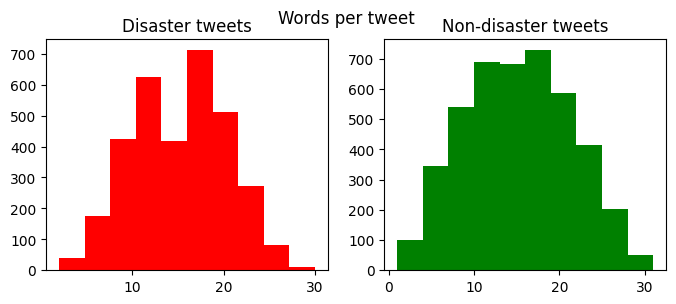

In [35]:
import matplotlib.pyplot as plt

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))
train_words=tweets[tweets['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=tweets[tweets['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

Aplicamos reglas comunes al texto:

- Pasamos todo a minuscula
- Quitamos sangrias, tabulaciones, espacios en blanco.
- Removemos tags html.
- Eliminamos la puntuación.
- Removemos numeros

In [36]:
import re, string

#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


Agregamos la biblioteca NLTK (Natural Language Toolkit) que nos proveera de las reglas del lenguaje ingles.

- Stopword: Consiste en la eliminación de conectores o articulos que no aportan en la vectorización del texto.
- Stemming: Reduce los terminos a la forma base o significado raiz, es decir trunca los terminos, por ejemplo quita los plurales.
- Lemmatization: Normaliza los terminos a la forma base, por ejemplo ("running," "runs," "ran") a una unica representacion como ("run")
- Tokenization: La idea es transformar un texto sin estructura, en un formato estructurado para ser utilizado por una machine learning como input.

In [37]:
#3. LEXICON-BASED TEXT PROCESSING EXAMPLES
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
    
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rtrig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


message cleaned may involve things like adjacent spaces tabs
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [38]:
# procesamiento final
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

tweets['clean_text'] = tweets['text'].apply(lambda x: finalpreprocess(x))
tweets=tweets.drop(columns=['word_count','char_count','unique_word_count'])
tweets.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...


In [39]:
# separamos los datos, un 80% para entrenar el modelo, 20% para probarlo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_val, y_train, y_val = train_test_split(tweets["clean_text"],
                                                  tweets["target"],
                                                  test_size=0.2,
                                                  shuffle=True)

# TF-IDF (Term Frequency-Inverse Document Frequency)
# TF calcula la frecuencia de cada palabra
# IDF mediante un calculo estadistico mide la importancia o no del termino en el contexto
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

# Vectorizamos los datos, esto signica que representamos los terminos por numeros,
# de modo que podemos ingresar numeros al modelo
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

In [40]:
# Creamos modelo de Regresion Logistica y entrenamos el modelo

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       888
           1       0.74      0.75      0.74       635

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Confusion Matrix: [[722 166]
 [160 475]]
AUC: 0.8472981840107824


In [41]:
# Ejemplo de prueba con datos del dataset
df_test=pd.read_csv('test.csv')
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test)    # vectorizamos los datos
y_predict = lr_tfidf.predict(X_vector)         # usamos el modelo
y_prob = lr_tfidf.predict_proba(X_vector)[:,1] # probabilidad que la prediccion sea correcta
df_test['predict_prob']= y_prob
df_test['target']= y_predict
print(df_test.head())

   id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2     NaN      NaN  Heard about #earthquake is different cities, s...   
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...   
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

                                          clean_text  predict_prob  target  
0                          happen terrible car crash      0.902492       1  
1  heard earthquake different city stay safe ever...      0.889095       1  
2  forest fire spot pond geese flee across street...      0.908940       1  
3                  apocalypse light spokane wildfire      0.863957       1  
4                 typhoon soudelor kill china taiwan      0.997662       1  


In [42]:
# podemos probar ahora nosotros

mi_test = {"text": ["it was a disaster", "An earthquake at Chile", "Something wonderful happens"]}
mi_df = pd.DataFrame.from_dict(mi_test)
mi_df['clean_text'] = mi_df['text'].apply(lambda x: finalpreprocess(x))
X_test=mi_df['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test)
y_predict = lr_tfidf.predict(X_vector)
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
mi_df['predict_prob']= y_prob
mi_df['target']= y_predict
print(mi_df)

                          text                   clean_text  predict_prob  \
0            it was a disaster                     disaster      0.766897   
1       An earthquake at Chile             earthquake chile      0.835236   
2  Something wonderful happens  something wonderful happens      0.131474   

   target  
0       1  
1       1  
2       0  
